This is a notebook that tests and illustrates how M-E works for the polarized case. 

In [1]:
from pymilne import milne
import numpy as np
import matplotlib.pyplot as plt


In [2]:
lambda0 = 6301.5080
JUp = 2.0
JLow = 2.0
gUp = 1.5
gLow = 1.833
lambdaStart = 6300.8
lambdaStep = 0.03
nLambda = 50


In [7]:
lineInfo = np.asarray([lambda0, JUp, JLow, gUp, gLow, lambdaStart, lambdaStep])

# Define the model
BField = 1500.0
BTheta = 70.0
BChi = 15.0
V_los = 2.0
damping = 0.1
B0 = 0.8
B1 = 0.2
mu = 1.0
VDop = 0.085
kl = 15.0
modelSingle = np.asarray([BField, BTheta, BChi, V_los, damping, B0, B1, VDop, kl])

# Generate the object and do one synthesis. The wavelength axis is a property of the object
s = milne(nLambda, lineInfo)
stokes = s.synth(modelSingle,mu)


In [8]:
stokes.shape

(4, 50)

In [9]:
modelSingle = np.asarray([BField, BTheta, BChi, 0.0, damping, B0, B1, VDop, kl])
stokes2 = s.synth(modelSingle,mu)

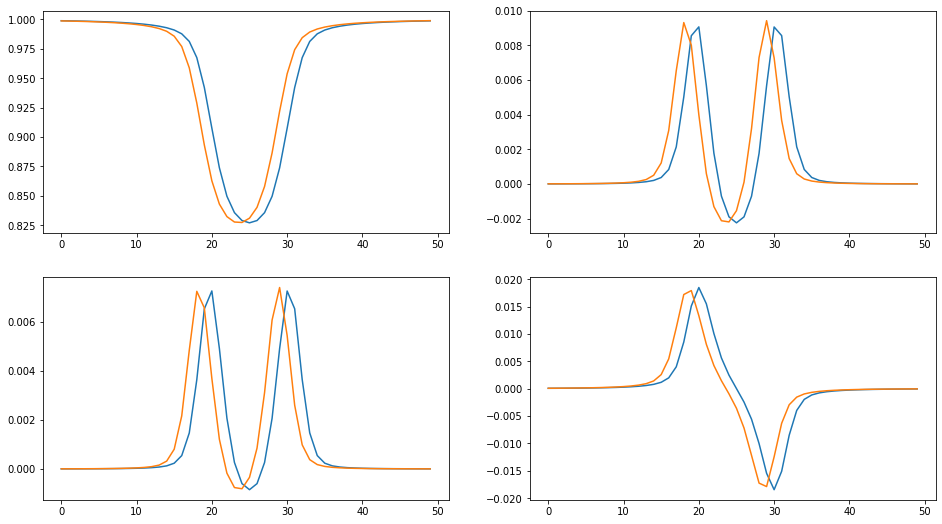

In [10]:
plt.figure(figsize=[16,9])
plt.subplot(221)
plt.plot(stokes[0])
plt.plot(stokes2[0])
plt.subplot(222)
plt.plot(stokes[1])
plt.plot(stokes2[1])
plt.subplot(223)
plt.plot(stokes[2])
plt.plot(stokes2[2])
plt.subplot(224)
plt.plot(stokes[3])
plt.plot(stokes2[3])


In [37]:
#let's actually create the model

In [12]:
def chisq(params,ll,obs,errors,mu,s):
    calc = s.synth(params,mu)
    res = (obs-calc)/errors
    res[0] /= 10.
    chisquared = np.sum(res**2.0)
    return chisquared
    
    

In [13]:
chisq(modelSingle,0,stokes,1E-3,1.0,s)

1072.6530701633696

In [14]:
modelTest = np.asarray([2000.0,45.0,22.5,1.0,1E-3,0.5,0.5,0.1,10])
chisq(modelTest,0,stokes,1E-3,1.0,s)

75284.28903553118

In [15]:
from scipy.optimize import minimize

result = minimize(chisq,modelTest,args=(0,stokes,1E-3,1.0,s),method='Nelder-Mead')
result = minimize(chisq,result.x,args=(0,stokes,1E-3,1.0,s),method='CG')

print("Chi sq = ", chisq(result.x,0,stokes,1E-3,1.0,s))

for i in range(0,len(modelSingle)):
    print (modelSingle[i],result.x[i])

Chi sq =  12.18995628962876
1500.0 1457.026942793827
70.0 70.77186487750699
15.0 15.21141483407765
0.0 1.9674432332025082
0.1 0.04587668387818051
0.8 0.784164818859935
0.2 0.21352162756063653
0.085 0.09365316539260082
15.0 10.035980813614257


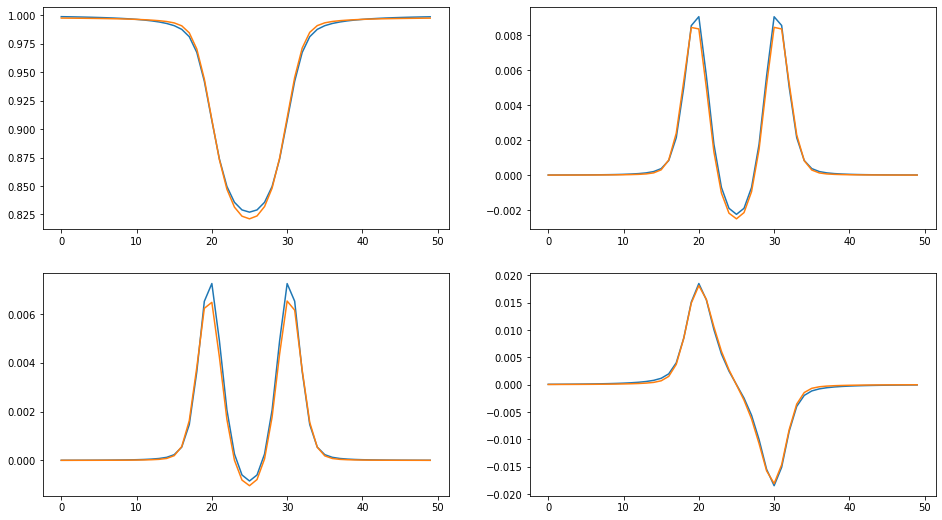

In [93]:
fit = s.synth(result.x,mu)

plt.figure(figsize=[16,9])
plt.subplot(221)
plt.plot(stokes[0])
plt.plot(fit[0])
plt.subplot(222)
plt.plot(stokes[1])
plt.plot(fit[1])
plt.subplot(223)
plt.plot(stokes[2])
plt.plot(fit[2])
plt.subplot(224)
plt.plot(stokes[3])
plt.plot(fit[3])